# AIM0404D2203 Lab 1 Topic Modelling (Sklearn)
---
<br>
<div style="font-size:20px;color:green;text-align:center"><strong>Dataset Dokumen Berita (Sklearn) </strong></div>
<br>
<img align=center src= "https://www.researchgate.net/publication/331669603/figure/fig1/AS:735488403070977@1552365508288/The-flow-of-LDA-Retrieved-from-https-toolboxkuriocoid-topic-modeling-696d7ba2592f.png">

<h1>Penjelasan Hands On</h1>

Pada pertemuan ini, kita akan belajar Topic Modeling menggunakan algoritme LDA (Latent Dirichlet Allocation). Kasus yang akan kita selesaikan yaitu terkait dokumen berita. Kita akan mengekstrak dokumen berita tersebut untuk mendapatkan topik-topik penting yang ada di dalamnya.

Proses menyelesaikan masalah di atas menggunakan pipeline pada Gambar di bawah ini:

1. Data collection 
2. Pre-processing
3. Feature Extraction
4. Menentukan Nilai K terbaik
5. Topic Modeling menggunakan LDA
6. Mencari kesimpulan terhadap topik yang terbentuk

<h1>Topic Modeling Pipeline</h1>
<img align=center src= "https://undangmi.com/wp-content/uploads/2022/09/LDA-pipeline.png">

# 01 Data Acquisition

In [ ]:
#Download dataset di bawah ini
#!wget https://docs.google.com/spreadsheets/d/180ghjRmSRcR2iRVxBwZtVuhe7UumRcyD/edit?usp=sharing&ouid=117844591790417079121&rtpof=true&sd=true

In [1]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [29]:
#reading the dataset
data= pd.read_csv('data_omnibuslaw.csv')
data.head(5)

,Text
0,Yukkk ah bersama Omnibus Law kita ikutan menol...
1,Yuk kita sukseskan RUU Omnibus Law untuk Indon...
2,yuk kita dukung #OmnibusLaw
3,Yuk gaes.. be smart. Bisa kok kritisi Omnibus ...
4,Yuk Dukung Omnibus Law


In [30]:
data['Text']

0       Yukkk ah bersama Omnibus Law kita ikutan menol...
1       Yuk kita sukseskan RUU Omnibus Law untuk Indon...
2                            yuk kita dukung #OmnibusLaw 
3       Yuk gaes.. be smart. Bisa kok kritisi Omnibus ...
4                                 Yuk Dukung Omnibus Law 
                              ...                        
3995    ‚ÄúOmnibus Law merupakan cerminan semakin rend...
3996    ‚ÄúOmnibus Law harus segera dibatalkan. Pertam...
3997    ‚ÄúDewan Perwakilan Rakyat‚Äù Katanya sebagai ...
3998    .... ,mengancam ruang hidup warga/umat dan men...
3999    -c- sangat kritikal bagi rakyat yang perlu dip...
Name: Text, Length: 4000, dtype: object

# 02 Text Preprocessing

## Case Folding

In [31]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
    text = text.lower()                               # Mengubah teks menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
    text = re.sub(r'[^\w\sö°]','', text)                # Menghapus karakter tanda baca
    text = text.strip()
    return text

In [33]:
raw_sample = data['Text'].iloc[50]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)

Raw data	:  UMKM Prioritas Pemerintah #Omnibuslaw 


Case folding	:  umkm prioritas pemerintah omnibuslaw


## Filtering (Stopword Removal)

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nycht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [35]:
len(stopwords_ind)

758

In [36]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [37]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['twupal', 'detikers']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [40]:
raw_sample = data['Text'].iloc[69]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)

Raw data	:  Tujuan Omnibus Law adalah mempercepat pertumbuhan ekonomi, menyederhanakan aturan yg menghambat proses percepatan ekonomi, yg kontra terhadap omnibuslaw adalah orang-orang yg masih alergi dengan terobosan dan pembaruan.


Case folding	:  tujuan omnibus law adalah mempercepat pertumbuhan ekonomi menyederhanakan aturan yg menghambat proses percepatan ekonomi yg kontra terhadap omnibuslaw adalah orangorang yg masih alergi dengan terobosan dan pembaruan


Stopword removal	:  tujuan omnibus law mempercepat pertumbuhan ekonomi menyederhanakan aturan yg menghambat proses percepatan ekonomi yg kontra omnibuslaw orangorang yg alergi terobosan pembaruan


## Stemming

In [12]:
# Install library Sastrawi
# !pip -q install sastrawi

In [41]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [60]:
raw_sample       = data['Text'].iloc[99]
case_folding     = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:  Tahan, di masa resesi banyak yg butuh cash, siap2 belanjain barang hasil jualan kepepet. Apalagi bunga bi masi di 6%, bakal lama ni ngangkatnya kecuali omnibus law segera beres, bakal resesi begini terus minimal 2021


Case folding	:  tahan di masa resesi banyak yg butuh cash siap belanjain barang hasil jualan kepepet apalagi bunga bi masi di  bakal lama ni ngangkatnya kecuali omnibus law segera beres bakal resesi begini terus minimal


Stopword removal	:  tahan resesi yg butuh cash belanjain barang hasil jualan kepepet bunga bi masi ni ngangkatnya kecuali omnibus law beres resesi minimal


Stemming	:  tahan resesi yg butuh cash belanjain barang hasil jual pepet bunga bi mas ni ngangkatnya kecuali omnibus law beres resesi minimal


## Text Preprocessing Pipeline

In [45]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = remove_stop_words(text)
    #text = stemming(text)
    return text

In [46]:
# !pip install swifter #Install swifter. digunakan untuk meningkatkan kecepatan proses pandas
import swifter

In [48]:
%%time
data['clean_article'] = data['Text'].swifter.apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

CPU times: total: 62.5 ms
Wall time: 669 ms


In [49]:
data

,Text,clean_article
0,Yukkk ah bersama Omnibus Law kita ikutan menol...,yukkk ah omnibus law ikutan menolak demo gmn k...
1,Yuk kita sukseskan RUU Omnibus Law untuk Indon...,yuk sukseskan ruu omnibus law indonesia
2,yuk kita dukung #OmnibusLaw,yuk dukung omnibuslaw
3,Yuk gaes.. be smart. Bisa kok kritisi Omnibus ...,yuk gaes be smart kritisi omnibus law aksi dem...
4,Yuk Dukung Omnibus Law,yuk dukung omnibus law
...,...,...
3995,‚ÄúOmnibus Law merupakan cerminan semakin rend...,äúomnibus law cerminan rendahnya komitmen peme...
3996,‚ÄúOmnibus Law harus segera dibatalkan. Pertam...,äúomnibus law dibatalkan ruu produk kebijakan ...
3997,‚ÄúDewan Perwakilan Rakyat‚Äù Katanya sebagai ...,äúdewan perwakilan rakyatäù penyalur aspirasi ...
3998,".... ,mengancam ruang hidup warga/umat dan men...",mengancam ruang hidup wargaumat mengabaikan pr...


In [ ]:
# save data preprocessing
# data.to_excel("dataset_preprocessing_news.xlsx")

# 03 Feature Extraction

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect =TfidfVectorizer(max_features=1000)
vect_text=vect.fit_transform(data['clean_article'])

In [51]:
#Menampilkan vocabulary dari TF-IDF
vect.vocabulary_

{'omnibus': 624,
 'law': 440,
 'ikutan': 292,
 'menolak': 542,
 'demo': 161,
 'klo': 412,
 'mending': 514,
 'aja': 12,
 'dukungobltolakaksidemo': 209,
 'yuk': 989,
 'ruu': 805,
 'indonesia': 297,
 'dukung': 206,
 'omnibuslaw': 626,
 'aksi': 17,
 'yg': 986,
 'krisis': 425,
 'ekonomi': 214,
 'kerja': 395,
 'sm': 862,
 'pemerintah': 684,
 'dpr_ri': 200,
 'membahas': 491,
 'pandemi': 656,
 'ga': 234,
 'berhak': 88,
 'outsourcing': 645,
 'khawatir': 406,
 'omnibuslawciptaker': 628,
 'ciptakerja': 140,
 'ciptaker': 139,
 'umkm': 955,
 'yangpastipastiaja': 985,
 'dukungomnibuslaw': 210,
 'terbaik': 904,
 'the': 921,
 'to': 930,
 'corona': 144,
 'waspadademotularkancovid': 980,
 'sah': 813,
 'ruuciptakerja': 807,
 'indonesiamaju': 301,
 'buruh': 121,
 'ditengah': 190,
 'covid': 145,
 'cipta': 137,
 'menguntungkan': 532,
 'memperkuat': 504,
 'menjamin': 540,
 'kesejahteraan': 397,
 'waspada': 979,
 'mafia': 463,
 'regulasi': 793,
 'pejabat': 673,
 'warga': 978,
 'kehidupan': 376,
 'new': 592,
 

In [52]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vect.transform(data['clean_article']).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vect.get_feature_names_out())
data_tabular_tf_idf

,_omnibus,_waaaaa__,adat,add,adil,adlh,administrasi,agraria,air,airlangga,...,zahrashyfa,zona,äì,úä,úäúä,üëç,üî,üò,üòä,üôè
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 04 LDA Model

In [62]:
#Algoritme LDA (Latent Diriclet Allocation)
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=0,max_iter=10) 

lda_top=lda_model.fit_transform(vect_text)

In [63]:
#Melihat probabilitas dokumen terhadap topik
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i+1,": ",topic*100,"%")

Document 0: 
Topic  1 :  18.699726673320395 %
Topic  2 :  16.31576044242618 %
Topic  3 :  45.09934552731959 %
Topic  4 :  5.415307419527041 %
Topic  5 :  14.469859937406792 %


In [67]:
data_cluster = []
for n in range(lda_top.shape[0]):
    topic_most_pr = lda_top[n].argmax()
    data_cluster.append(topic_most_pr)
    print("doc: {} topic: {}\n".format(n,topic_most_pr))
data ['cluster'] = data_cluster 

doc: 0 topic: 2

doc: 1 topic: 2

doc: 2 topic: 2

doc: 3 topic: 2

doc: 4 topic: 2

doc: 5 topic: 2

doc: 6 topic: 2

doc: 7 topic: 2

doc: 8 topic: 0

doc: 9 topic: 1

doc: 10 topic: 1

doc: 11 topic: 2

doc: 12 topic: 4

doc: 13 topic: 2

doc: 14 topic: 2

doc: 15 topic: 4

doc: 16 topic: 3

doc: 17 topic: 3

doc: 18 topic: 1

doc: 19 topic: 1

doc: 20 topic: 2

doc: 21 topic: 1

doc: 22 topic: 3

doc: 23 topic: 0

doc: 24 topic: 2

doc: 25 topic: 2

doc: 26 topic: 2

doc: 27 topic: 2

doc: 28 topic: 4

doc: 29 topic: 4

doc: 30 topic: 4

doc: 31 topic: 3

doc: 32 topic: 4

doc: 33 topic: 0

doc: 34 topic: 0

doc: 35 topic: 3

doc: 36 topic: 3

doc: 37 topic: 1

doc: 38 topic: 4

doc: 39 topic: 0

doc: 40 topic: 2

doc: 41 topic: 0

doc: 42 topic: 0

doc: 43 topic: 0

doc: 44 topic: 0

doc: 45 topic: 0

doc: 46 topic: 0

doc: 47 topic: 3

doc: 48 topic: 0

doc: 49 topic: 0

doc: 50 topic: 2

doc: 51 topic: 0

doc: 52 topic: 3

doc: 53 topic: 2

doc: 54 topic: 0

doc: 55 topic: 0

do

In [68]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 1: 
umkm omnibus pandemi ruu law omnibuslaw pemerintah maju covid ekonomi 

Topic 2: 
gagalkanomnibuslaw atasiviruscabutomnibus gagalkan omnibus law tolakomnibuslaw omnibuslaw rakyat negara yg 

Topic 3: 
dukung omnibuslaw law omnibus ayo indonesiamaju mari kebijakan gagalkanomnibus indonesia 

Topic 4: 
kerja cipta pekerja ruu omnibuslaw lapangan law omnibus investasi indonesia 

Topic 5: 
tolak omnibus law ruu menolak aksi dpr mahasiswa buruh cipta 



In [69]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_words:
        print(t,end=" ")
    print("\n")

Topic 1: 
('umkm', 43.53582277075504) ('omnibus', 42.71045428861285) ('pandemi', 42.452207713075865) ('ruu', 42.40509838860021) ('law', 42.068523756541175) ('omnibuslaw', 40.609867149057045) ('pemerintah', 34.94323495274267) ('maju', 30.353285015043948) ('covid', 29.282920490779563) ('ekonomi', 27.74505546365436) 

Topic 2: 
('gagalkanomnibuslaw', 104.09805007265668) ('atasiviruscabutomnibus', 80.57516917743163) ('gagalkan', 66.06246275530638) ('omnibus', 64.04357371817612) ('law', 63.49772858127334) ('tolakomnibuslaw', 63.00445620566724) ('omnibuslaw', 57.80907992985595) ('rakyat', 52.65206265200543) ('negara', 30.266442709267437) ('yg', 29.587344550719603) 

Topic 3: 
('dukung', 97.59487843113445) ('omnibuslaw', 60.97598770303907) ('law', 57.93042718152767) ('omnibus', 57.585805096281376) ('ayo', 37.50124373208223) ('indonesiamaju', 36.973690074504916) ('mari', 32.894821193924116) ('kebijakan', 31.565663261656013) ('gagalkanomnibus', 28.09097456918155) ('indonesia', 27.77109968159564

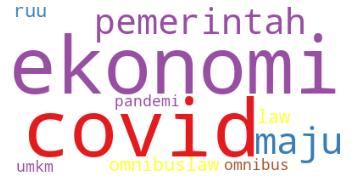

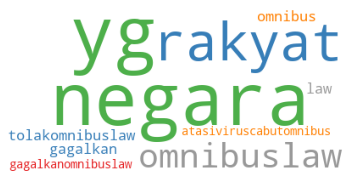

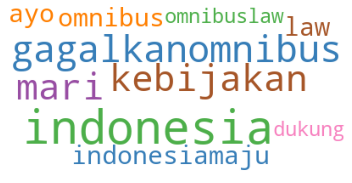

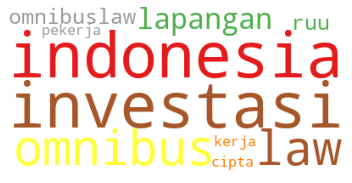

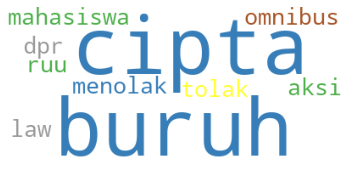

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for index, topic in enumerate(lda_model.components_):
    tmps = [vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    text = " ".join(str(topik) for topik in tmps)
    wordcloud = WordCloud(max_words=10,colormap='Set1', background_color="white").generate(text)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
 

In [71]:
data

,Text,clean_article,cluster
0,Yukkk ah bersama Omnibus Law kita ikutan menol...,yukkk ah omnibus law ikutan menolak demo gmn k...,2
1,Yuk kita sukseskan RUU Omnibus Law untuk Indon...,yuk sukseskan ruu omnibus law indonesia,2
2,yuk kita dukung #OmnibusLaw,yuk dukung omnibuslaw,2
3,Yuk gaes.. be smart. Bisa kok kritisi Omnibus ...,yuk gaes be smart kritisi omnibus law aksi dem...,2
4,Yuk Dukung Omnibus Law,yuk dukung omnibus law,2
...,...,...,...
3995,‚ÄúOmnibus Law merupakan cerminan semakin rend...,äúomnibus law cerminan rendahnya komitmen peme...,1
3996,‚ÄúOmnibus Law harus segera dibatalkan. Pertam...,äúomnibus law dibatalkan ruu produk kebijakan ...,4
3997,‚ÄúDewan Perwakilan Rakyat‚Äù Katanya sebagai ...,äúdewan perwakilan rakyatäù penyalur aspirasi ...,0
3998,".... ,mengancam ruang hidup warga/umat dan men...",mengancam ruang hidup wargaumat mengabaikan pr...,0
